## Analyzing Gun Deaths in the United States (2012-2014)

This study analyzes gun deaths in the United States of America between 
2012 and 2014.
This case study will try to answer the following questions:
• What is the number of annual suicide gun deaths in the 
United States from 2012 to 2014, by gender?
• What is the number of gun deaths by race in the United 
States per 100,000 people from 2012 to 2014?
• What is the annual number of gun deaths in the United 
States on average from 2012 to 2014, by cause?
• What is the percentage per 100,000 people of annual 
gun deaths in the United States from 2012 to 2014, by 
cause?
• What is the percentage of annual suicide gun deaths in 
the United States from 2012 to 2014, by year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Death data.csv', index_col=0)

In [3]:
dataset.shape

(100798, 10)

In [4]:
dataset.head(2)

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college


In [5]:
dataset.year.value_counts()

year
2013    33636
2014    33599
2012    33563
Name: count, dtype: int64

In [8]:
# organize the dataset by year and then month
dataset_Gun = dataset
dataset_Gun.sort_values(['year','month'], inplace=True)

In [9]:
dataset_Gun

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
12,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,HS/GED
135,2012,1,Suicide,0,F,59.0,White,100,Home,HS/GED
...,...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,31.0,Black,100,Other specified,HS/GED
100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100796,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED


## Data Analysis

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100798 entries, 1 to 100797
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   hispanic   100798 non-null  int64  
 8   place      99414 non-null   object 
 9   education  99376 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 8.5+ MB


In [12]:
dataset.describe()

,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607
std,0.816278,3.405609,0.117114,19.496181,61.595734
min,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000


### Q1. How many males and females are included in this study?

In [14]:
dataset.groupby('sex')['sex'].count()

sex
F    14449
M    86349
Name: sex, dtype: int64

#### OR

In [15]:
dataset['sex'].value_counts()

sex
M    86349
F    14449
Name: count, dtype: int64

### Q2. How many educated females are included in this study?

In [16]:
dataset.education

1                  BA+
2         Some college
3                  BA+
12              HS/GED
135             HS/GED
              ...     
100793          HS/GED
100794          HS/GED
100795          HS/GED
100796          HS/GED
100797    Less than HS
Name: education, Length: 100798, dtype: object

In [18]:
dataset.columns

Index(['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic',
       'place', 'education'],
      dtype='object')

In [20]:
dataset[['sex','education']].value_counts()

sex  education   
M    HS/GED          37339
     Less than HS    19444
     Some college    17750
     BA+             10600
F    HS/GED           5588
     Some college     3930
     Less than HS     2379
     BA+              2346
Name: count, dtype: int64

In [25]:
dataset.groupby('sex').count()

,year,month,intent,police,age,race,hispanic,place,education
sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


### Data Visualization

### Q3 What is the number of suicide gun deaths in the United States from 2012 to 2014, by gender?

In [29]:
dataset.groupby(['sex','intent']).count()

year  month  police    age   race  hispanic  place  \
sex intent                                                              
F   Accidental      218    218     218    218    218       218    218   
    Homicide       5373   5373    5373   5372   5373      5373   5310   
    Suicide        8689   8689    8689   8687   8689      8689   8689   
    Undetermined    169    169     169    169    169       169    169   
M   Accidental     1421   1421    1421   1420   1421      1421   1421   
    Homicide      29803  29803   29803  29795  29803     29803  28483   
    Suicide       54486  54486   54486  54481  54486     54486  54486   
    Undetermined    638    638     638    637    638       638    638   

                  education  
sex intent                   
F   Accidental          208  
    Homicide           5288  
    Suicide            8579  
    Undetermined        168  
M   Accidental         1390  
    Homicide          29399  
    Suicide           53714  
    Undetermined        629

<AxesSubplot:title={'center':'Annual U.S.\\suicide gun deaths \n 2012-2014, by gender'}, xlabel='sex'>

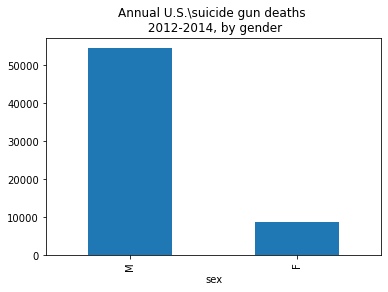

In [38]:
dataset_suicide_Gender =dataset_Gun[dataset_Gun["intent"] =="Suicide"]
dataset_suicide_Gender.sex.value_counts().plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')

In [40]:
dataset_suicide_Gender.sex.value_counts()

sex
M    54486
F     8689
Name: count, dtype: int64

It’s clear that there are huge differences between males and females. 
The number of male suicides by gun is above 50,000, while the female 
death rate is below 10,000, which shows how males are more likely to 
commit suicide using a gun.

### Q4. What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?

In [51]:
 dataset_byRace = dataset.race.value_counts()

In [53]:
dataset_byRace = (dataset_byRace*100)/100000

In [54]:
dataset_byRace

race
White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: count, dtype: float64

<AxesSubplot:title={'center':'Percent death toll from guns in the United States \nfrom 2012 to 2014, by race'}, xlabel='race'>

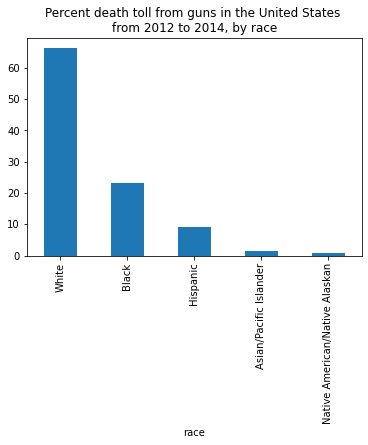

In [56]:
dataset_byRace.plot.bar(title='Percent death toll from guns in \
the United States \nfrom 2012 to 2014, by race')

### Q5 What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?

In [62]:
dataset1 = (dataset.intent.value_counts()*100)/100000

In [63]:
dataset1

intent
Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: count, dtype: float64

<AxesSubplot:title={'center':'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause'}, xlabel='intent'>

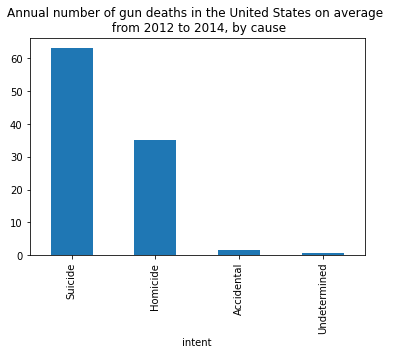

In [64]:
dataset1.plot.bar(title='Annual number of gun deaths in the United States on \
average \n from 2012 to 2014, by cause')